In [ ]:
# !pip install supervision --user

In [23]:
# !pip install ultralytics --upgrade


Found https://blog.roboflow.com/content/images/2023/12/car.jpeg locally at car.jpeg
image 1/1 d:\GMRIT\sem-6\DL\Lab\car.jpeg: 480x640 1 car, 229.5ms
Speed: 2.9ms preprocess, 229.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


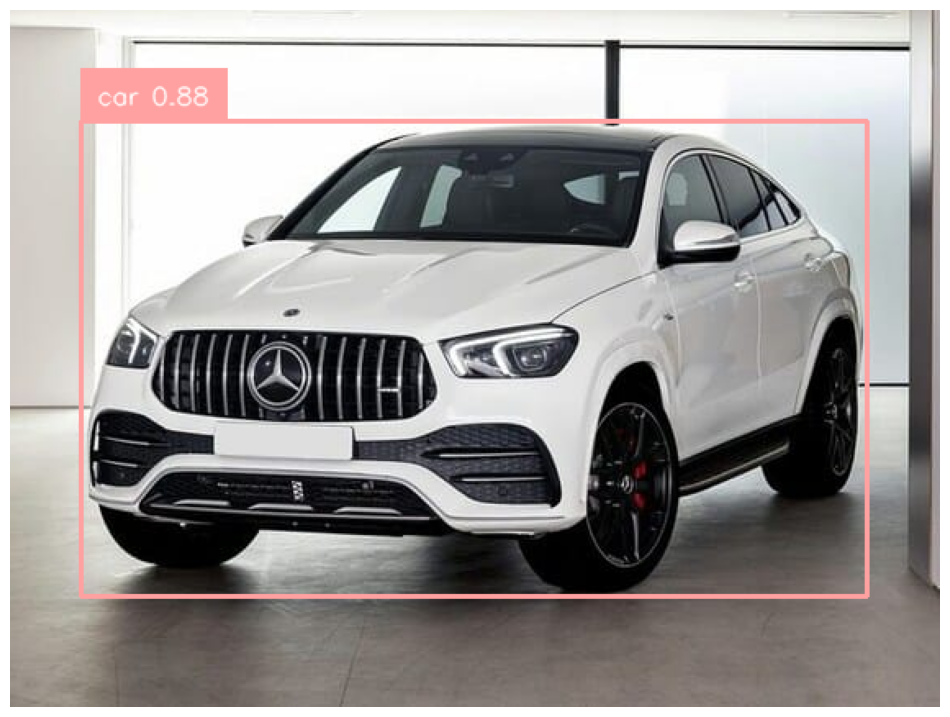

['car 0.88']


In [22]:
from ultralytics import YOLO
import cv2
import supervision as sv
model = YOLO('yolov8s.pt')
results = model("https://blog.roboflow.com/content/images/2023/12/car.jpeg")
detections = sv.Detections.from_ultralytics(results[0])
image = cv2.imread("car.jpeg")
classes = model.names
class_id=list(detections)[0][3]
confidence=list(detections)[0][2]

labels = [
    f"{classes[int(class_id)]} {confidence:0.2f}"
#     for _, _, confidence, class_id, _
#     in detections
]
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
sv.plot_image(annotated_image)
print(labels)